Jack Slater  
Michaele Sloversmith  
Paolo Syiaco  
Dilara Topaloglu

# Data Science 100 Final Project Report #

#### Background ####

The researchers behind the Plaicraft project are interested in seeing how people play video games, and are using the game, Minecraft, to gather their data. However, they have a few questions about who to target when recruiting participants, and if the software they have can handle them. 

### Question ###

For this project, we have chosen to answer **Question 1** - "We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts."

More specifically, we are looking to see if we can predict `total playtime duration` using `age`, `gender`, `experience level`, and `average playtime session`. This is because we are looking for players who will give the researchers the most data, hence predicting total played hours.

### Reading in and Tidying the Datasets ###

The following packages are installed to help us create and visualize our data analysis:

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(readr)
library(cowplot)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [4]:
options(repr.matrix.max.rows = 10)
# Importing both CSV files into R and loading them
url_players <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
url_sessions <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
players <- read_csv(url_players)
sessions <- read_csv(url_sessions)
players
sessions

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17,NA,NA
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,NA,NA
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
⋮,⋮,⋮,⋮,⋮
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,10/05/2024 23:01,10/05/2024 23:07,1.71538e+12,1.71538e+12
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12


For this project, we are using both of the provided datasets: `players.csv` and `sessions.csv`

In [5]:
# Tidying up the sessions dataset 
sessions_tidy <- sessions |>
    select(hashedEmail, start_time, end_time) |>
    filter(na.rm = TRUE)
# Calculating the average session time per player
sessions_tidy <- sessions_tidy |> 
    mutate(start_time_numeric = as.numeric(as.POSIXct(start_time, format="%d/%m/%Y  %H:%M"))) |>
    mutate(end_time_numeric = as.numeric(as.POSIXct(end_time, format="%d/%m/%Y  %H:%M"))) |>
    mutate(session_length = (end_time_numeric - start_time_numeric)/60)
average_session_length <- sessions_tidy |>
    group_by(hashedEmail) |>
    summarise(average_session_time = mean(session_length, na.rm = TRUE))
# Moving the average_session_length column to the players dataset
players_merged <- inner_join(players, average_session_length, join_by(hashedEmail))
players_merged

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName,average_session_time
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,74.77778
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA,85.00000
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA,5.00000
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA,50.00000
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA,9.00000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,TRUE,ba24bebe588a34ac546f8559850c65bc90cd9d51b821581bd6e25cff437a1081,0.1,Gabriela,Female,44,NA,NA,11.00000
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,NA,NA,21.00000
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA,5.00000


To clean and tidy the `sessions` dataset, we selected the variables we needed (`hashedEmail`, `start_time`, `end_time`) and made sure there were no N/As in any of the rows. We then mutated the start and end time variables to make them numbers that were easier to work with using `as.numeric(as.POSIXct())`. This is because we needed to find the average session length for each player or "hashed email”. From this dataset, we only needed average session length, so we used inner_join to add that variable to the `players` dataset.

In [6]:
# Tidying up the players dataset
players_tidy <- players_merged |>
    select(experience, hashedEmail, played_hours, gender, age, average_session_time) |>
    filter(na.rm = TRUE) |>
    relocate(experience, .after = gender) |>
    relocate(age, .after = played_hours) |>
    arrange(desc(played_hours)) |>
    mutate(gender = case_when(
        gender == "Male" ~ "Male",
        gender == "Female" ~ "Female",
        TRUE ~ "Other")) |>

# Combining all other genders into "Other" to make it easier to work with
mutate(gender_male = case_when(gender == "Male" ~ 1, gender == "Female" ~ 0, gender == "Other" ~ 0),
        gender_female = case_when(gender == "Male" ~ 0, gender == "Female" ~ 1, gender == "Other" ~ 0),
        gender_other = case_when(gender == "Male" ~ 0, gender == "Female" ~ 0, gender == "Other" ~ 1)) |>
# Converting the data in the "Experience" column to numbers 
mutate(experience = recode(experience, "Beginner" = 1, "Amateur" = 2, "Regular" = 3, "Veteran" = 4, "Pro" = 5))
players_tidy 

hashedEmail,played_hours,age,gender,experience,average_session_time,gender_male,gender_female,gender_other
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,17,Male,3,66.99087,1,0,0
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,20,Other,3,150.34043,0,0,1
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,19,Female,3,80.45578,0,1,0
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,16,Female,2,62.55975,0,1,0
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,56.1,23,Male,2,15.46774,1,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
a2a0612e9a7da558cbac2ee3c816740324505a69a6e042c94aa1b67731f9ff01,0,18,Male,3,6,1,0,0
2cfed571797b66cc810c32562fc5b0f70b5bec0f5250799245527135bbf9662e,0,16,Male,2,6,1,0,0
bda1905e54b6c745bcced9d59ce655a5bfd03c35cc6abdd8d1610e5c416f79d1,0,17,Male,2,5,1,0,0


To clean and tidy the `players` dataset that included our new average session time variable, we first selected the variables we needed (`experience`, `hashedEmail`, `played_hours`, `gender`, `age`, `average_session_time`) and removed N/As. We used the `relocate()` function simply to order the variables to something more visually pleasing. For our prediction model to work, we needed to then convert the `gender` variable into separate columns. To do this, we first combined any gender that was not male or female into the `Other` category, because there is much less of each of the other genders. Then we used `mutate()` and `case_when()` to turn each variable into a binary number, depending on what the focus was. This allowed us to properly complete our model. We then used `recode()` to give each experience level a number as well. 


#### Final Data Set

This data set includes 9 variables and 125 observations. It:

- Describes players
    - Lists their ages as integers
    - Lists their experience level (“Beginner”, "Amateur", "Regular", "Pro", "Veteran", now labelled with 1 to 5) as a double value
    - States whether each person subscribed to emails from the researchers as a logical value
    - Lists each player's anonymous email as a character value
    - Lists their gender as a character value (“Male”, “Female”, “Other”)
    - Has a Male gender variable as a double value, where if the player’s gender is male, there is a 1, and a zero if they are not male
    - Has a Female gender variable as a double value, where if the player’s gender is female, there is a 1, and a zero if they are not female
    - Has an Other gender variable as a double value, where if the player’s gender is other, there is a 1, and a zero if they are not other.
    - Lists each player’s average play session length as a double value

### Data Analysis and Findings ###

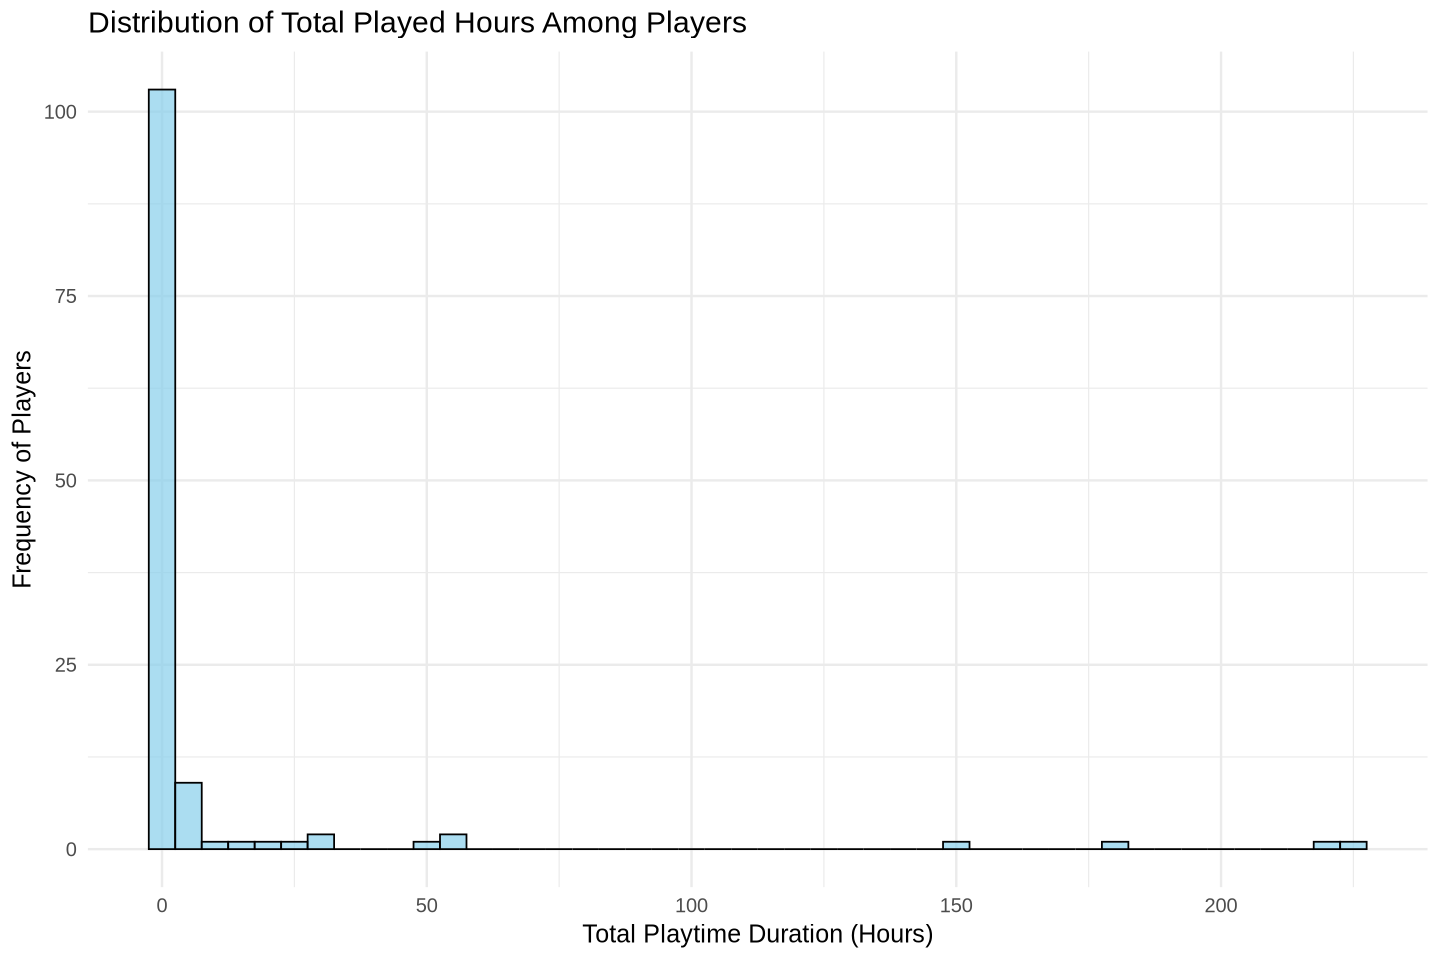

In [44]:
# Graphing distribution of played hours
options(repr.plot.width = 12, repr.plot.height = 8)

hours_played <- ggplot(players_tidy, aes(x = played_hours)) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black", alpha = 0.7) +
  xlab("Total Playtime Duration (Hours)") +
  ylab("Frequency of Players") + 
  ggtitle("Distribution of Total Played Hours Among Players") + 
  theme_minimal(base_size = 15)
hours_played

**Figure 1:** This histogram shows that most players have very low playtime, with the largest number of players at around 0 hours. As playtime increases, the number of players drops sharply. There are spikes at certain playtime values (such as 5, 30, 50, and 55 hours), but overall, most players tend to have relatively low playtime durations. A few players, however, have very high playtime, as seen in the higher bars at values like 150, 180, and 220 hours, though these are much less common. 

`geom_smooth()` using formula = 'y ~ x'


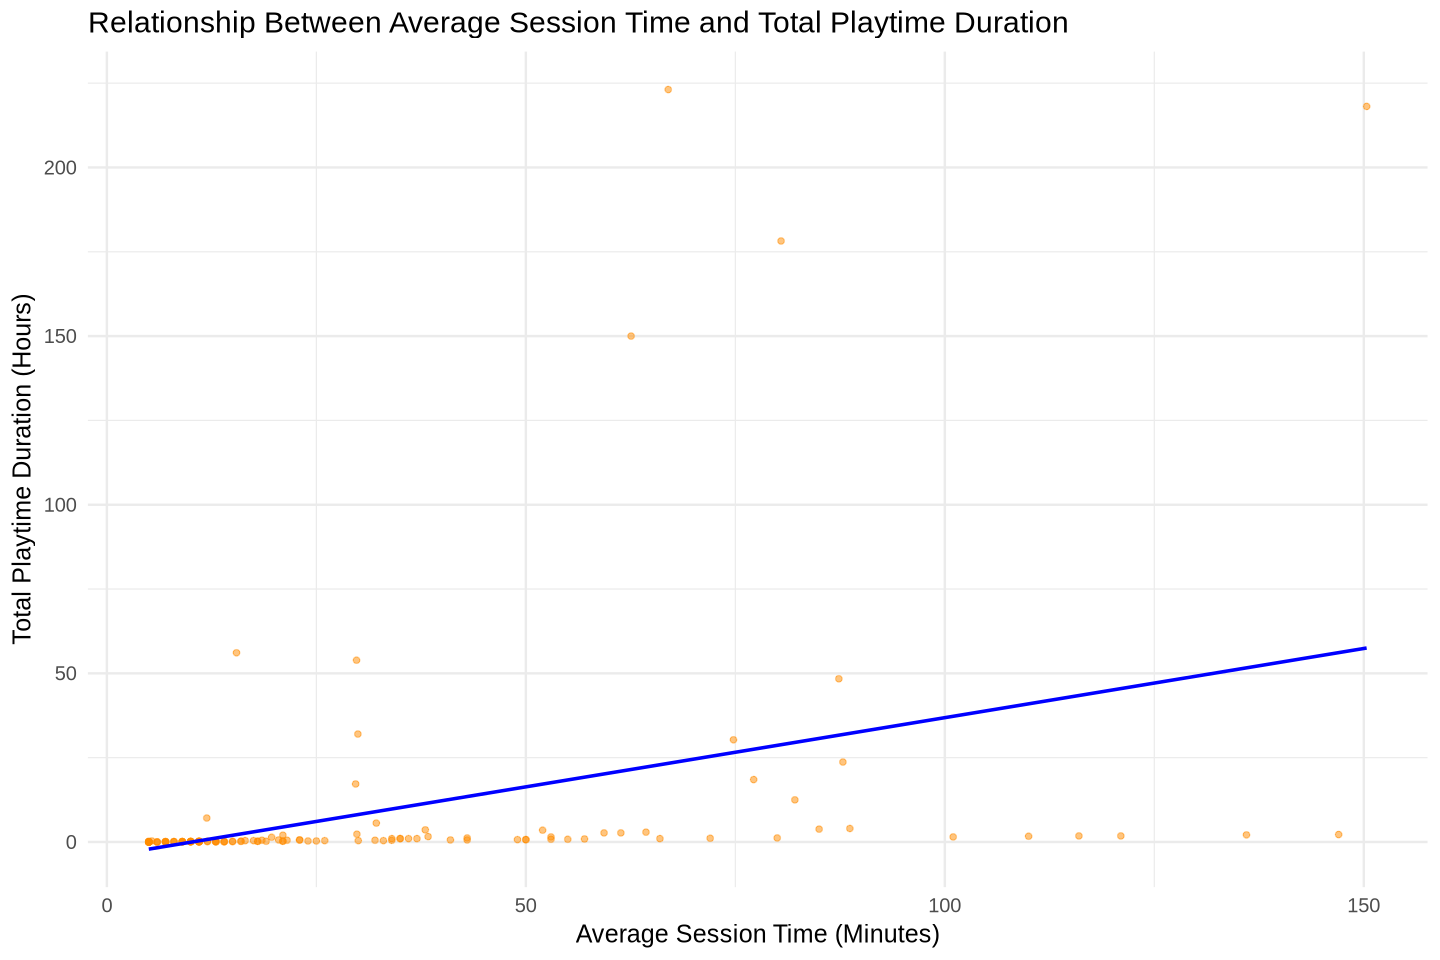

In [43]:
# Average session time and played hours relationship
options(repr.plot.width = 12, repr.plot.height = 8)
session_vs_playtime_plot <- ggplot(players_tidy, aes(x = average_session_time, y = played_hours)) +
  geom_point(alpha = 0.5, color = "darkorange") +
  geom_smooth(method = "lm", color = "blue", se = FALSE) +
  xlab("Average Session Time (Minutes)") +
  ylab("Total Playtime Duration (Hours)") +
  ggtitle("Relationship Between Average Session Time and Total Playtime Duration") +
  theme_minimal(base_size = 15)

session_vs_playtime_plot 

**Figure 2:** This scatter plot shows a majority of points clustered around 0 playtime duration and within the 5 to 25 minutes range of average session time. Notably, there is a high-value point at around 60 hours of playtime corresponding to an average session time of 20 minutes. As session times increase beyond 25 minutes, the density of points decrease, with most points showing low playtime durations, around 0 or 5 hours. Between 75 and 100 minutes, the density of points further drops, though session times rise. Points after 100 minutes are sparse, all with near-zero playtime. 

The blue trendline begins below zero duration and increases steadily with session time. This indicates a positive relationship between average session time and playtime duration, suggesting that as players spend more time per session, their total playtime increases as well. The scatter points; however, show variability, with many players still logging low playtime despite higher session times, pointing to diverse play patterns across the dataset. 

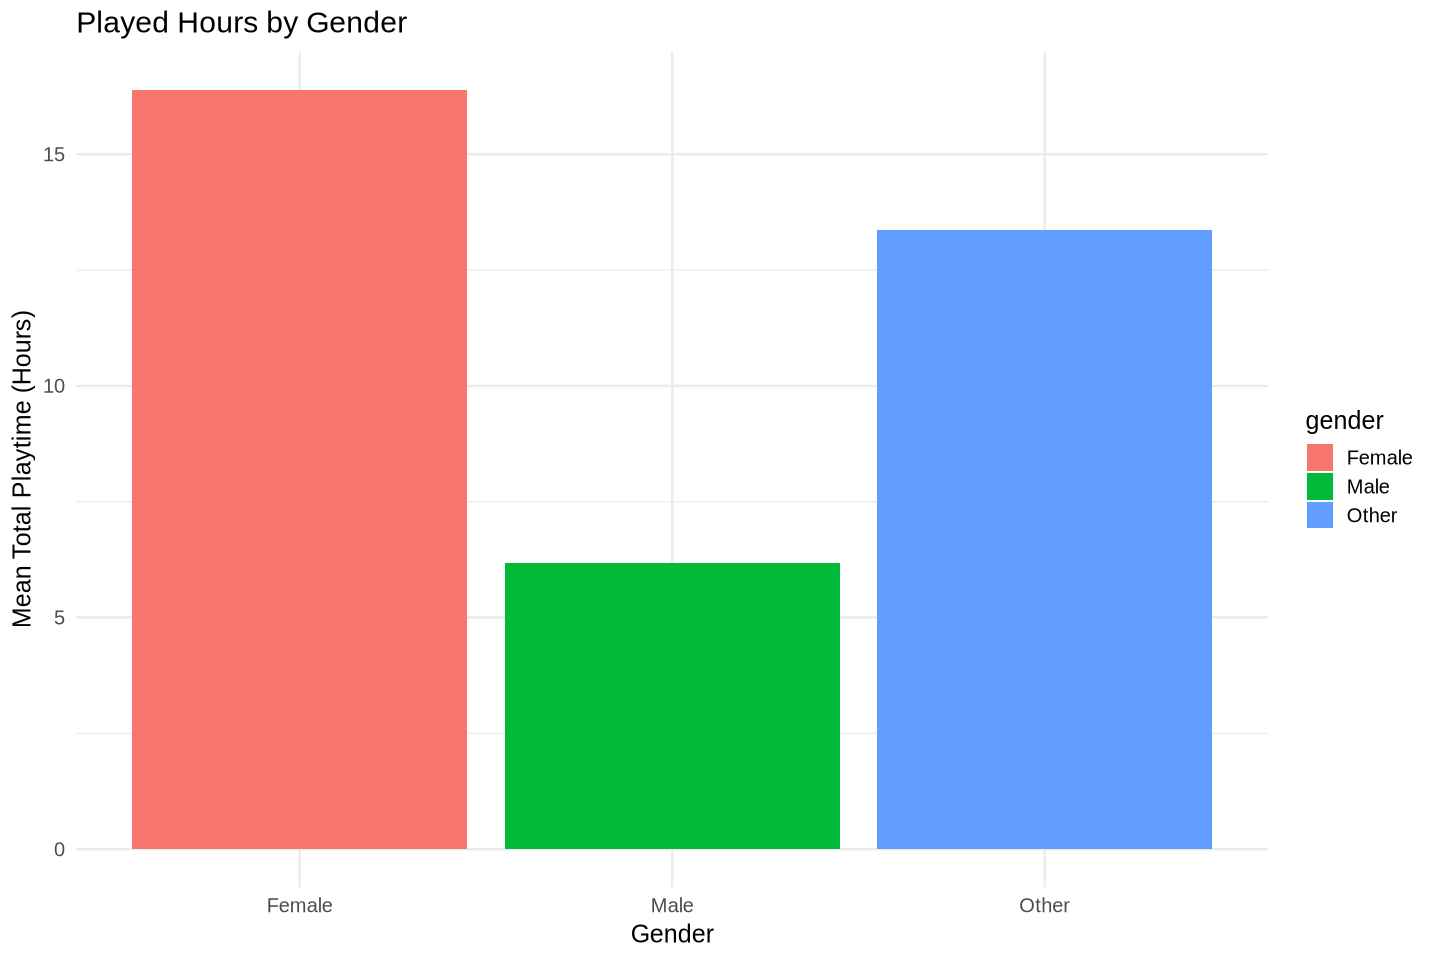

In [42]:
# Graphing played hours across genders in tidy data
options(repr.plot.width = 12, repr.plot.height = 8)
gender_summary <- players_tidy |>
    group_by(gender) |>
    summarize(mean_hours = mean(played_hours, na.rm = TRUE))

gender_playtime_plot <- ggplot(gender_summary, aes(x = gender, y = mean_hours, fill = gender)) +
    geom_bar(stat = "identity") +
    xlab("Gender") +
    ylab("Mean Total Playtime (Hours)") +
    ggtitle("Played Hours by Gender") +
    theme_minimal(base_size = 15)

gender_playtime_plot 

**Figure 3:** This bar chart shows the average total playtime by gender. Female players have the highest average playtime, above 15 hours, followed by "Other" gender players, around 12.5–15 hours. Male players have the lowest average, around 6 hours. This suggests that female players tend to spend more time playing on average, while male players play less overall, with the "Other" group falling in between. These differences may reflect varying gaming habits across genders. 

`geom_smooth()` using formula = 'y ~ x'


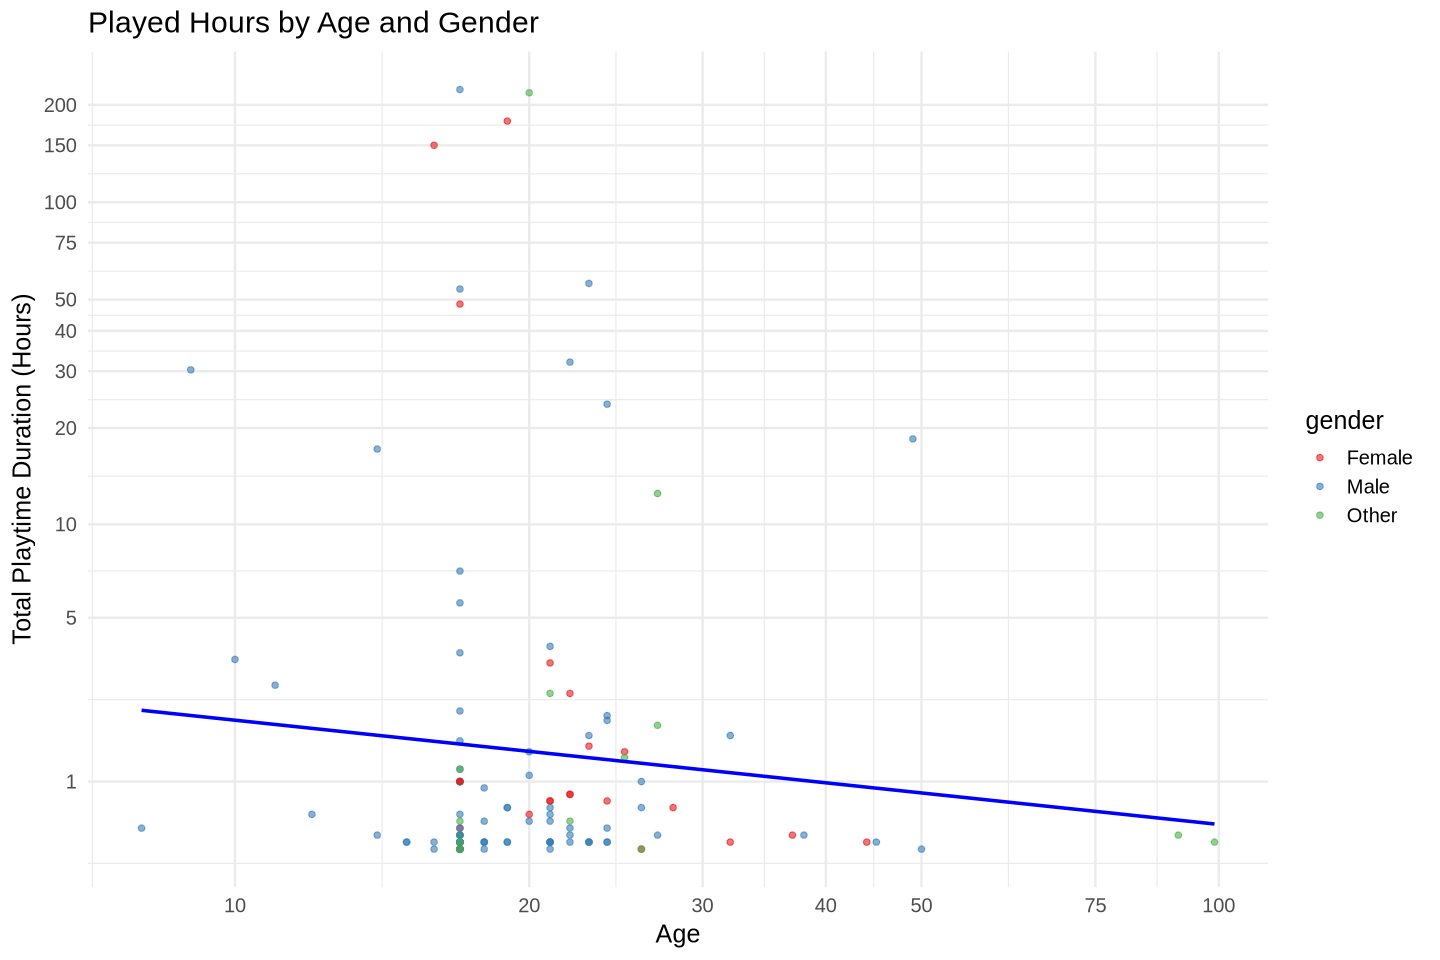

In [41]:
# Visualizing age vs played hours with gender
options(repr.plot.width = 12, repr.plot.height = 8)
age_played_hours <- ggplot(players_tidy, aes(x = age, y = played_hours, color = gender)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
    scale_x_continuous(trans = "pseudo_log",breaks = c(1, 5, 10, 20, 30, 40, 50, 75, 100)) +
    scale_y_continuous(trans = "pseudo_log",breaks = c(1, 5, 10, 20, 30, 40, 50, 75, 100, 150, 200)) +
  xlab("Age") +
  ylab("Total Playtime Duration (Hours)") +
  ggtitle("Played Hours by Age and Gender") +
  theme_minimal(base_size = 15) +
  scale_color_brewer(palette = "Set1")

age_played_hours


**Figure 4:** The scatter plot shows that most players, across all genders, have low playtime duration, particularly among younger players (under 25), with males exhibiting more variation in playtime. The highest playtime (up to 225 hours) is observed in males between ages 17.5 and 25. Older players generally show lower playtime, especially around ages 65 and above, with most points clustered near 0 hours. The regression line represents the overall trend, starting at around 10 hours for younger players and steadily decreasing with age, reflecting a decline in playtime as age increases. 


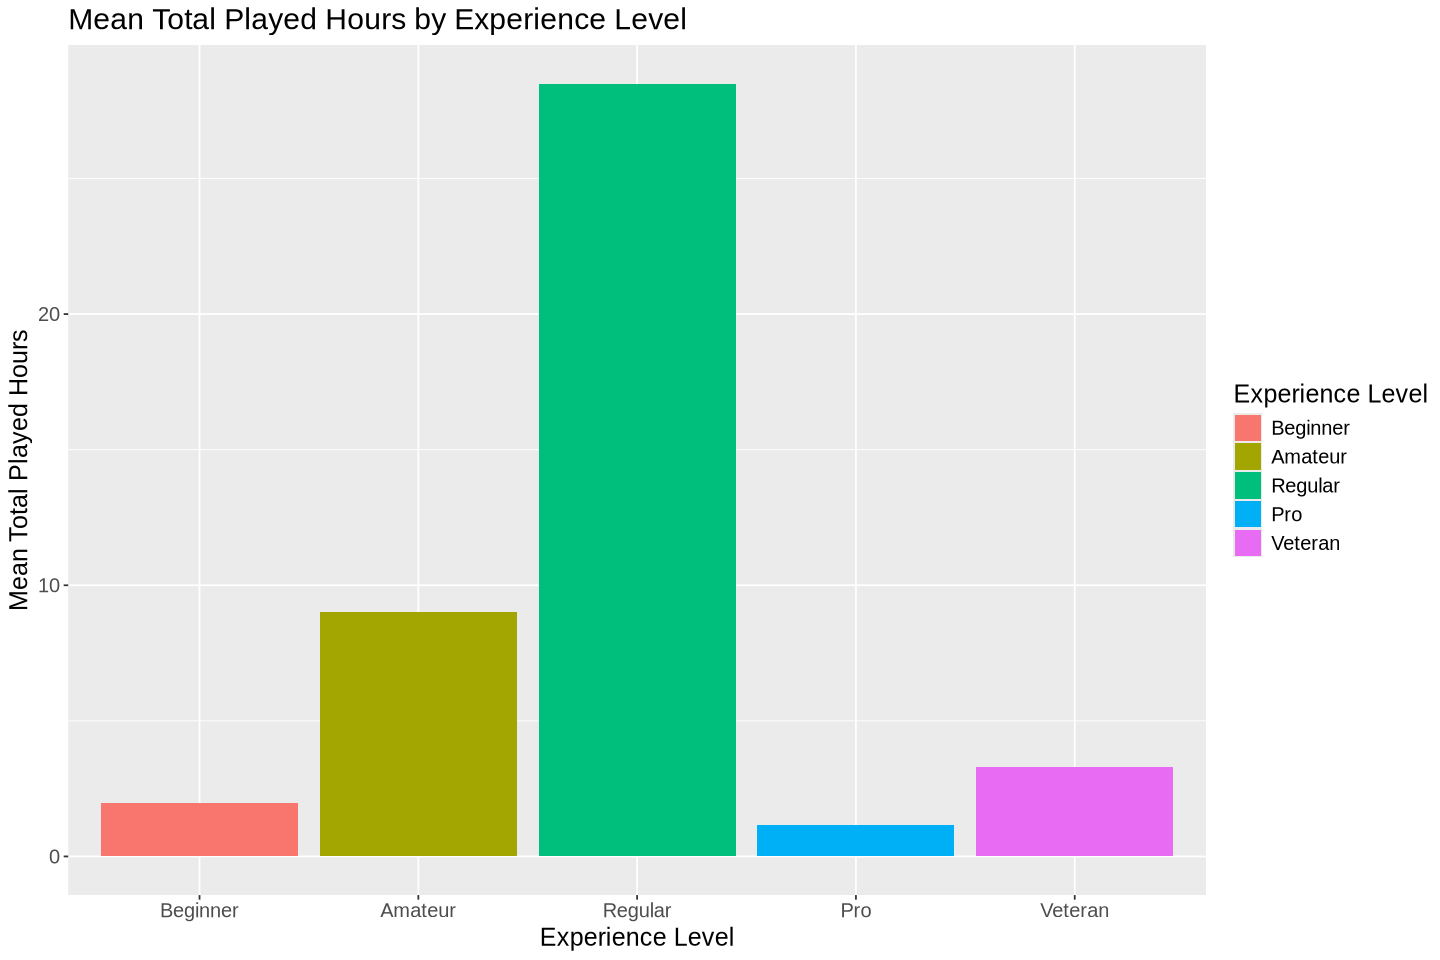

In [17]:
# Bar chart with hours and experience
options(repr.plot.width = 12, repr.plot.height = 8)

summary_experience <- players_tidy |>
                    mutate(experience = factor(experience, levels = 1:5, 
                           labels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran"))) |>
                    group_by(experience) |>
                    summarize(mean_played_hours = mean(played_hours))

experience_plot <- summary_experience |>
                ggplot(aes(x = experience, y = mean_played_hours, fill = experience)) +
                geom_bar(stat = "identity") +
                labs(x = "Experience Level", y = "Mean Total Played Hours", 
                     title = "Mean Total Played Hours by Experience Level", fill = "Experience Level") +
                theme(text = element_text(size=15))
experience_plot

**Figure 5:** This bar chart shows the mean total played hours across five experience levels. Players identified as "Beginner" have the lowest playtime, averaging around 2 hours. "Amateur" players average close to 8 hours, while "Regular" players have the highest playtime, averaging approximately 28 hours. Interestingly, "Pro" players have the lowest playtime after "Beginner.""Veteran" players fall just above "Beginner," with an average around 4 hours. This suggests that experience does not always correlate with higher playtime, and some experience levels, like "Pro," show lower engagement than expected. 

In [12]:
set.seed(3500) #DO NOT CHANGE
# Splitting the data into test and training splits
players_split <- initial_split(players_tidy, prop = 0.75, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)


With our clean dataset, we split it `75/25` into training and testing data, so our model can learn before it is put to the test.

In [13]:
set.seed(2499) # DO NOT CHANGE  
# Creating the K-NN regression model
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
       set_engine("kknn") |>
       set_mode("regression")
players_recipe <- recipe(played_hours ~ age + gender_male + gender_female + gender_other + experience + average_session_time, data = players_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Tuning the model to find the best K value
players_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)
gridvals <- tibble(neighbors = seq(1, 60, by = 3))

players_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) 

players_results <- players_workflow |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics()

players_min <- players_results |>
    filter(.metric == "rmse") |>
    slice_min(mean)
    players_min

k_min <- players_min |>
        pull(neighbors)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
55,rmse,standard,28.84632,5,8.88291,Preprocessor1_Model19


For this project, we chose to use $k$-nn regression to predict total played hours, therefore our first step was to create our recipe, scale our predictors, and create our $k$-nn spec so we could use 5-fold cross validation to find a good k-value.

After collecting the metrics, we found the lowest rmse and pulled the $k$-value associated with it. 

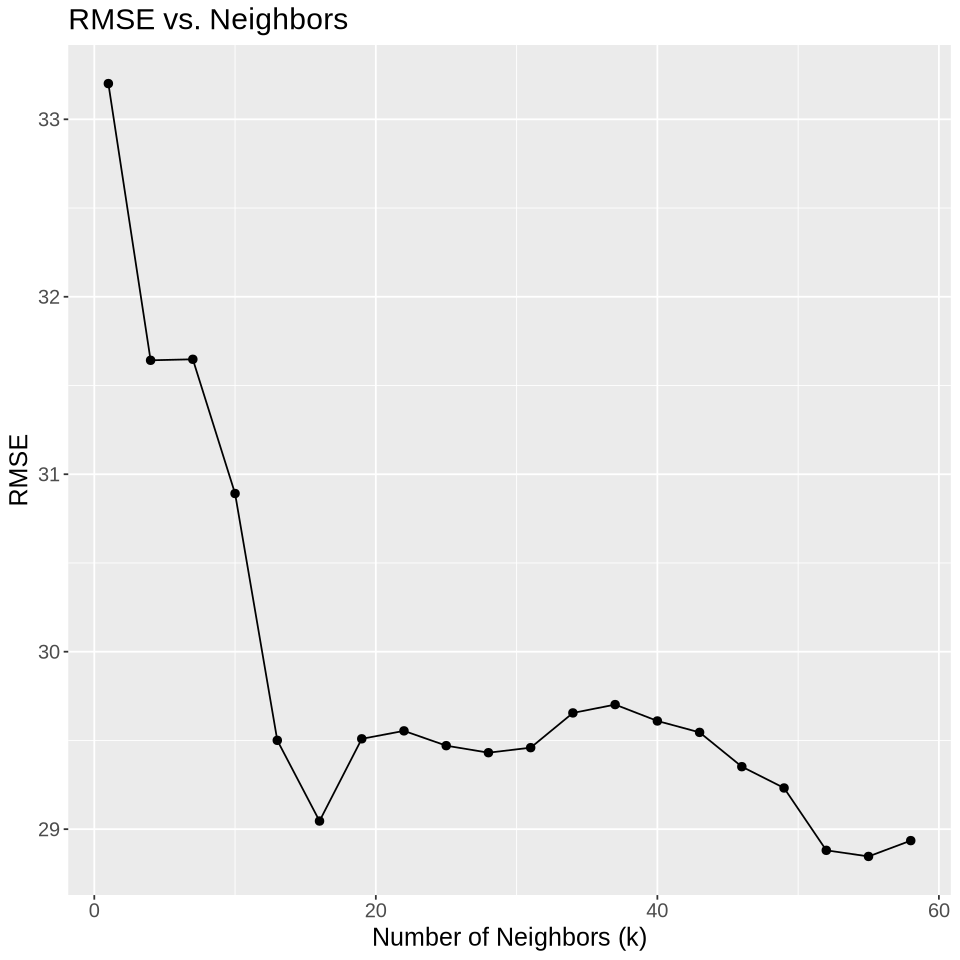

In [36]:
options(repr.plot.width = 8, repr.plot.height = 8)
ggplot(players_results |> 
       filter(.metric == "rmse"), aes(x = neighbors, y = mean)) +
        geom_line() +
        geom_point(size = 2) +
        xlab("Number of Neighbors (k)") +
        ylab("RMSE") +
        ggtitle("RMSE vs. Neighbors") +
        theme(text = element_text(size=15))

**Figure 6:** This plot shows the RMSE against the number of $k$-values. This way we can visualize where our best $k$-value was taken from, and how it compares to the others.

In [16]:
# Fitting the model with the optimal K value 
players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |> 
       set_engine("kknn") |>
       set_mode("regression")

players_best_fit <- workflow() |>
                    add_recipe(players_recipe) |>
                    add_model(players_best_spec) |>
                    fit(data = players_training)

# Applying the model to the testing data to check for the RMSE
players_summary <- players_best_fit |>
                    predict(players_testing) |>
                    bind_cols(players_testing) |>
                    metrics(truth = played_hours, estimate = .pred)
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,37.68946387
rsq,standard,0.09510881
mae,standard,15.08357955


The RMSE value of 37.69 indicates that the model's predictions differ from the actual values by about 37.69 units (hours). Given the size of the data, this may be appropriate, but may also indicate that there is potential for improvement, especially given what we are trying to predict, as a +/- of 37 hours is quite a lot. The R-squared score of 0.095 also suggests that the model only explains a small amount of the data. This low R-squared number, paired with the comparatively large RMSE, indicates that extra features or a new modeling approach may be required to increase performance.

.pred,hashedEmail,played_hours,age,gender,experience,average_session_time,gender_male,gender_female,gender_other
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15.340000,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,20,Other,3,150.34043,0,0,1
6.976364,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,53.9,17,Male,2,29.79231,1,0,0
6.858182,e74c60a92c0100e7240be56d66969db85856152b048c639331a3595f901461ae,7.1,17,Male,1,11.91489,1,0,0
7.572727,8e0aac3020b3fd9cdef4840b533b4b105aaf1ce1f6f2df3f328ba2a44cecfdc1,2.9,11,Male,2,64.33333,1,0,0
15.216364,8d2eed1f399e0d77cebb8fcc48ed19ad2fa8e3bb3fa683cb90e0ac6d42677bf2,2.2,24,Male,4,147.00000,1,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
7.023636,e21a324ccf5c873bafe82e47d5137b36aa312ee4803eeb5cbc6cf945f9bb3f38,0,17,Male,3,6,1,0,0
9.332727,25879aecc205544bc6505f9faf768356e0a3b7126057308ae3235f8a514e9a62,0,17,Female,2,7,0,1,0
9.385455,722ab6d91280c439f2780767a1250889e93f75fc0ba0bc48175da022ab3e9ea9,0,17,Female,1,5,0,1,0


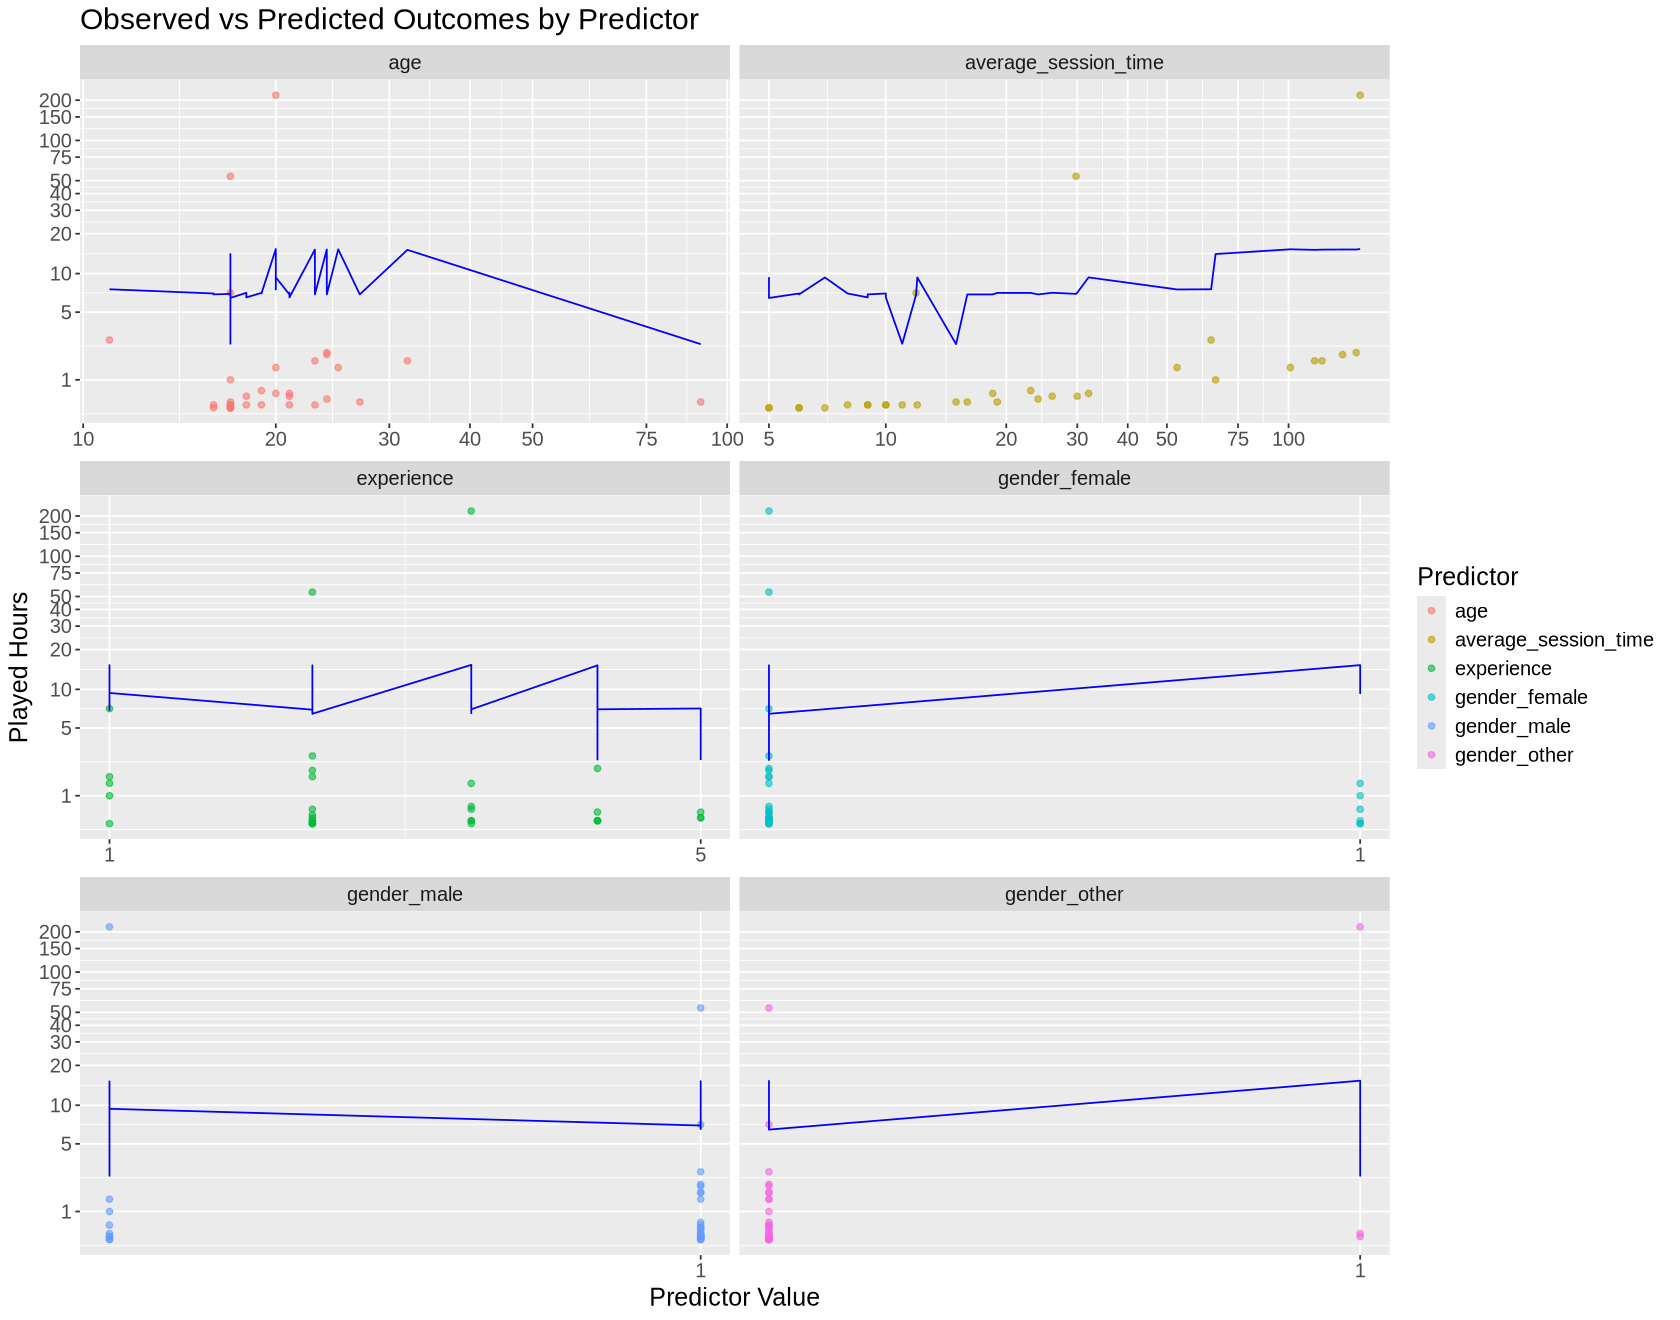

In [35]:
options(repr.plot.width = 14, repr.plot.height = 11)

player_preds <- players_best_fit |>
                    predict(players_testing) |>
                    bind_cols(players_testing)
player_preds

results_long <- player_preds |>
              pivot_longer(cols = c("age", "gender_male", "gender_female", "gender_other", "experience", "average_session_time"), 
                names_to = "predictor",   
                values_to = "value")

results_plot <- ggplot(results_long, aes(x = value, y = played_hours)) +
  geom_point(aes(color = predictor), alpha = 0.6) + 
  geom_line(aes(y = .pred, group = predictor), color = "blue") + # Predicted line
  facet_wrap(~ predictor, scales = "free_x", ncol = 2, nrow = 3) + # Facet by predictor  
   scale_x_continuous(trans = "pseudo_log",breaks = c(1, 5, 10, 20, 30, 40, 50, 75, 100)) +
   scale_y_continuous(trans = "pseudo_log",breaks = c(1, 5, 10, 20, 30, 40, 50, 75, 100, 150, 200)) +
  labs(
    x = "Predictor Value",
    y = "Played Hours",
    title = "Observed vs Predicted Outcomes by Predictor",
    color = "Predictor") +
    theme(text = element_text(size=15))
results_plot

**Figure 7:** The transformation applied to both axes enhances clarity by addressing the wide range of values. Without this transformation, the visualization might obscure insights about smaller playtimes due to extreme outliers, which is a critical limitation of this dataset due to the many low numbers.

### Summary Plots ###

##### Age #####
Younger players generally exhibit higher playtimes, with some recording hundreds of hours. This aligns with the stereotype that younger individuals might have more leisure time to dedicate to gaming. As age increases, a trend of diminishing playtimes emerges. However, some older players defy this trend, contributing to a broader spread in the data. The regression line summarizes the central trend well, but there are clear fluctuations, especially in the lower age ranges. The regression line begins to descend linearly after around the age of 32, because the majority of the participants were below the age of 30. This means that our model will have a hard time predicting played hours if the participant’s age is higher than 30. A limitation with using age is that we are assuming each player was truthful when entering their ages, but we can’t actually be sure.

##### Average Session Time #####
There was, predictably, a positive correlation with longer playing sessions and higher playtime; however, some people had a low session time and still had decent playtime. This could possibly happen because these players have busy schedules and can’t afford to sit down for long periods of time to contribute to the game. Alternatively it may be important to consider players who don’t fall into being a category of a “gamer” and are unable to sit comfortably to play a game for prolonged amounts of time. 

##### Experience ##### 
When we looked at the experience levels, an unexpected trend was observed. “Regular” players logged the highest average playtime, significantly outperforming both lower-level players like “Beginner” and higher-level groups such as “Pro” and "Veteran." This result suggests that less experienced players may spend more time on activities as they explore and learn the game mechanisms. In contrast, more experienced players are likely to finish in-game tasks more efficiently, as they are already familiar with the processes and strategies, resulting in shorter game sessions. For example, “Pro” and “Veteran” players may focus on competitive or strategic gameplay, where precision and speed are prioritized over time.

##### Female Gender #####
When observing the female gender plot, we can see that players who identify as female tend to contribute more hours to the game. The initial spike at the beginning of the plot is because there are both male and other gender players that contributed very little as well as many hours to the game.

##### Male Gender #####
In this plot, we see that there is a slight general decrease in played hours by players identifying as male. There are, however, both positive and negative spikes, showing there are outliers with both lots and little playtime for all genders. 

##### Other Genders #####
From this plot we observe a positive increase in played hours by players who identify as one of the other genders listed when signing up. 

### Analysis Conclusions ###

From this analysis, we have concluded that the players who will give the Plaicraft researchers the most data (most played hours) are female players who are less than 30, with regular experience, which may imply that they are casual players. Other important groups to target would be players who identify as the “other” gender category, as well as players who consider their experience level to be amateur. 

We did not expect this outcome in our analysis. In our initial assumptions, we figured that players had to have long session times to be able to contribute the most data, and that players 

These findings could impact who the researchers market to when collecting data, but these groups of people are also who they may want to target if the researchers go into developing and releasing new games. For example, they may make a game specifically easier to get into to try and attract more regular and amateur participants, or make a game more fast paced to attract a youthful audience.

Future questions and research could use our conclusions in their research. Session time related to experience level could be a helpful metric to use to try and create a game that caters to newer players by lowering the complexity which allows the game to be picked up or dropped at any time. 


#### References ####

Wickham, Hadley, and Garrett Grolemund. R for Data Science. O'Reilly Media, 2016. "Join Cheatsheet." Additional Resources, stat545.com/join-cheatsheet.html. 

Priyank, Mishra. How to Use lm() Function in R to Fit Linear Models?. GeeksforGeeks, 19 Dec. 2021, https://www.geeksforgeeks.org/how-to-use-lm-function-in-r-to-fit-linear-models/. 